# Backtest Analysis Notebook

This notebook is for backtesting trading strategies and analyzing performance.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../data/btc_usdt.csv', parse_dates=['timestamp'])

In [5]:
# Calculate moving averages
df['SMA_20'] = df['close'].rolling(window=20).mean()
df['SMA_50'] = df['close'].rolling(window=50).mean()

In [6]:
# Initialize trading simulation
cash = 10000  # starting capital in USD
btc = 0
in_position = False
buy_price = 0
trade_log = []

In [7]:
# Strategy loop
for i in range(1, len(df)):
    row = df.iloc[i]
    prev_row = df.iloc[i - 1]

    # Check for crossover (20 crosses above 50)
    if not in_position and prev_row['SMA_20'] < prev_row['SMA_50'] and row['SMA_20'] > row['SMA_50']:
        # Buy signal
        btc = cash / row['close']
        buy_price = row['close']
        cash = 0
        in_position = True
        trade_log.append((row['timestamp'], 'BUY', buy_price))

    # Check for crossunder (20 crosses below 50)
    elif in_position and prev_row['SMA_20'] > prev_row['SMA_50'] and row['SMA_20'] < row['SMA_50']:
        # Sell signal
        cash = btc * row['close']
        sell_price = row['close']
        btc = 0
        in_position = False
        trade_log.append((row['timestamp'], 'SELL', sell_price))

In [8]:
# Final portfolio value
final_value = cash if not in_position else btc * df.iloc[-1]['close']
print(f"\nFinal Portfolio Value: ${final_value:.2f}")


Final Portfolio Value: $13461.69


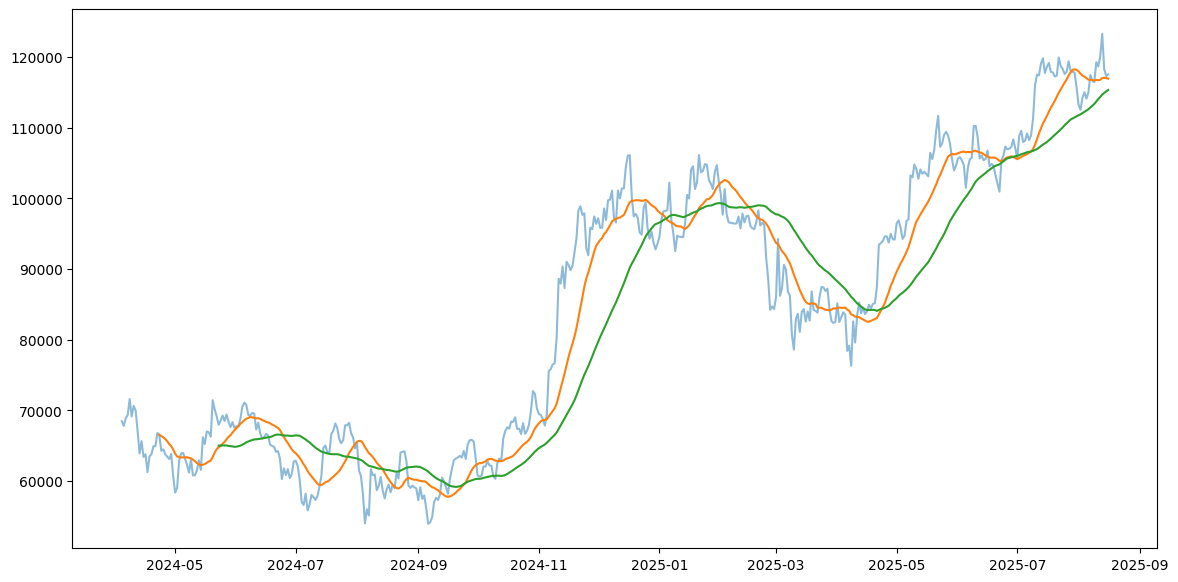

In [9]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['timestamp'], df['close'], label='BTC Price', alpha=0.5)
plt.plot(df['timestamp'], df['SMA_20'], label='SMA 20')
plt.plot(df['timestamp'], df['SMA_50'], label='SMA 50')

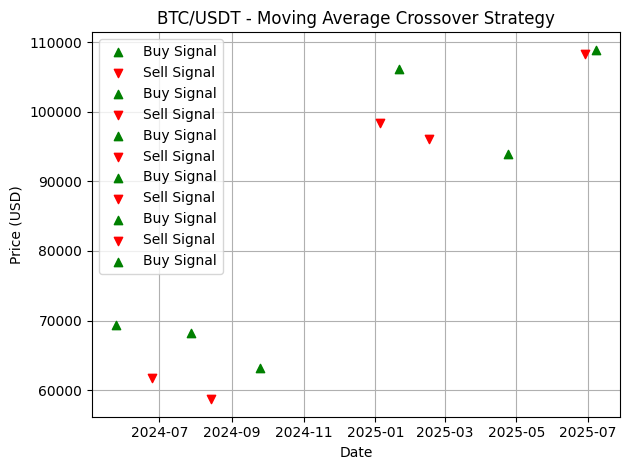

In [10]:
# Mark buy/sell points
for t, action, price in trade_log:
    if action == 'BUY':
        plt.scatter(t, price, marker='^', color='green', label='Buy Signal', zorder=5)
    elif action == 'SELL':
        plt.scatter(t, price, marker='v', color='red', label='Sell Signal', zorder=5)

plt.title('BTC/USDT - Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()